In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/hover_net-master

/content/drive/MyDrive/Colab Notebooks/hover_net-master


In [ ]:
pip3 install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/cu102/torch_stable.html

     |████████████████████████████████| 748.8 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 16.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
!pip install -r requirements.txt

In [ ]:
import torch

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print("device_count: {}".format(device_count))
    for device_num in range(device_count):
        print("device {} capability {}".format(device_num,torch.cuda.get_device_capability(device_num)))
        print("device {} name {}".format(device_num, torch.cuda.get_device_name(device_num)))

else:
    print("no cuda device")

device_count: 1
device 0 capability (6, 0)
device 0 name Tesla P100-PCIE-16GB


In [ ]:
!python run_infer.py --gpu=0 --type_info_path=type_info.json --batch_size=32 --model_mode=original --model_path=checkpoint/hovernet_original_kumar_notype_tf2pytorch.tar tile --input_dir=dataset/biotox/ --output_dir=dataset/biotox/pred/ --draw_dot --save_qupath --save_raw_map

|2021-11-08|09:05:31.243| [INFO] .... Detect #GPUS: 1
Process Patches: 40it [01:24,  2.11s/it]
|2021-11-08|09:07:32.060| [INFO] ........................ Done Assembling img_2955
|2021-11-08|09:07:32.254| [INFO] ........................ Done Assembling img_2954
|2021-11-08|09:07:32.490| [INFO] ........................ Done Assembling img_4094
|2021-11-08|09:07:32.757| [INFO] ........................ Done Assembling img_4098
|2021-11-08|09:07:33.008| [INFO] ........................ Done Assembling img_4097
|2021-11-08|09:07:33.252| [INFO] ........................ Done Assembling img_4093
|2021-11-08|09:07:33.491| [INFO] ........................ Done Assembling img_7229


In [ ]:
import os

os.listdir('dataset/biotox')

['img_5391.png', 'img_9119.png', 'img_9119_gray.png']

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/hover_net-master/dataset/biotox/pred/mat

/content/drive/MyDrive/Colab Notebooks/hover_net-master/dataset/biotox/pred/mat


<class 'dict'>
__header__
__version__
__globals__
inst_map
inst_uid
inst_centroid
raw_map


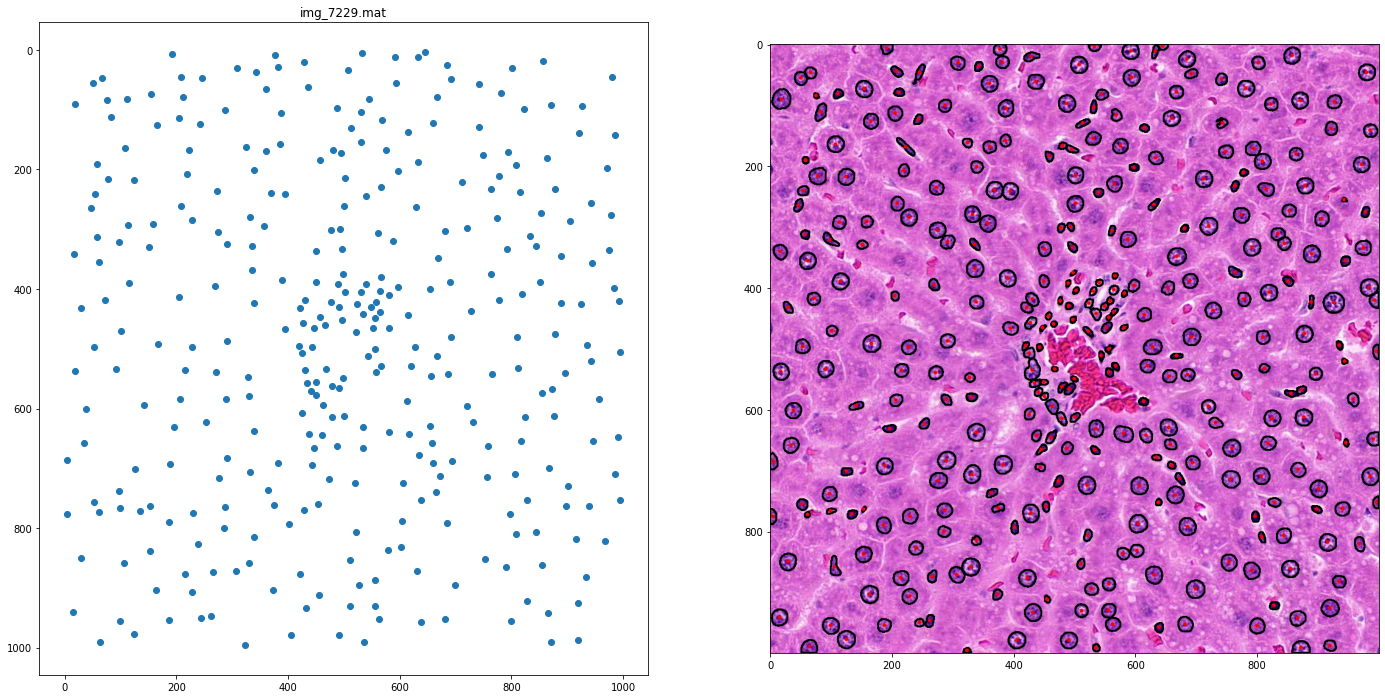

In [83]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io
from skimage import io


mat_file_name =  "img_7229.mat"
mat_file = scipy.io.loadmat(mat_file_name)

img = io.imread('../overlay/img_7229.png')
print(type(mat_file))

for i in mat_file:
    print(i)
    
mat_file_value = mat_file['inst_centroid']

plt.figure(figsize=(24, 12))
plt.subplot(121)
plt.title(mat_file_name)
plt.scatter(mat_file_value[:, 0], mat_file_value[:, 1])
plt.gca().invert_yaxis()

plt.subplot(122)
plt.imshow(img)

plt.show()

In [84]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd

mat_file_value = pd.DataFrame(mat_file_value)

# create model and prediction
model = DBSCAN(eps=45, min_samples=6)
predict = pd.DataFrame(model.fit_predict(mat_file_value))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([mat_file_value,predict],axis=1)

print(r)

              0           1  predict
0    191.616197    6.901408       -1
1    377.465909    8.607955       -1
2    532.823810    4.680952       -1
3    644.750000    3.826389       -1
4    592.015544   11.583765       -1
..          ...         ...      ...
338   64.280808  989.838384       -1
339  919.382759  987.386207       -1
340  871.734000  990.702000       -1
341  535.411290  991.137097       -1
342  323.268817  995.784946       -1

[343 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


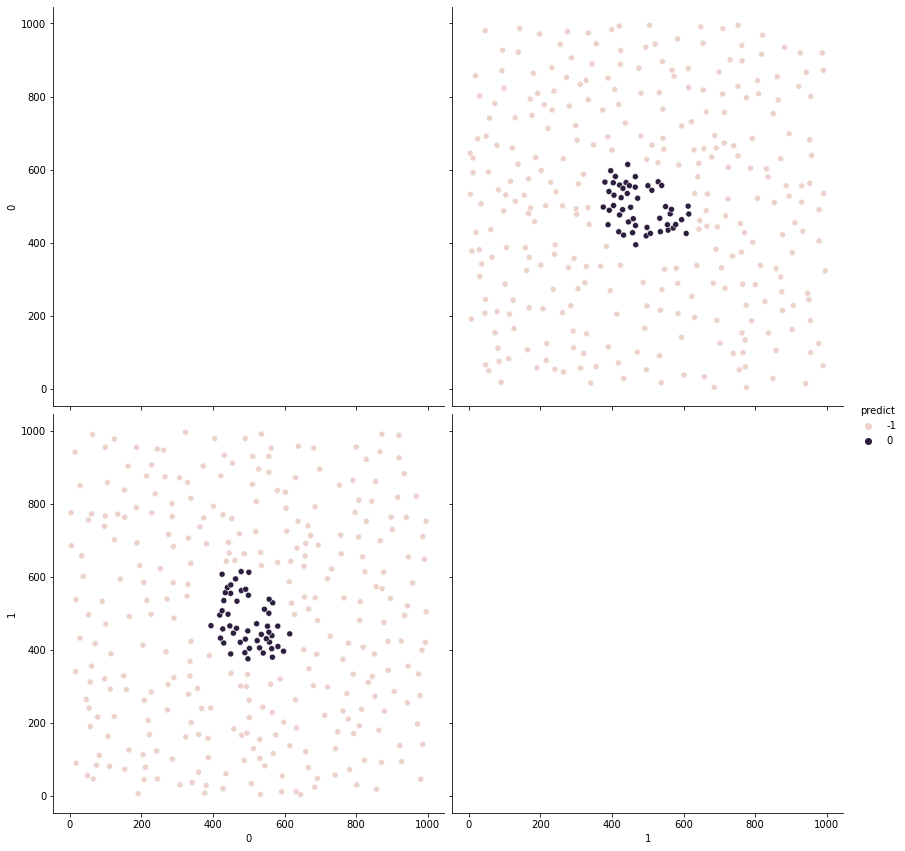

In [85]:
sns_plot = sns.pairplot(r, hue='predict', size=6, kind='scatter', diag_kind='None')
sns_plot.savefig("output1.png")
plt.show()